# QUELLE EVOLUTION DES ENTRÉES À LA MÉDIATHÈQUE ?

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt,timedelta
from datetime import datetime,date
import matplotlib.pyplot as plt
import seaborn as sns

from kiblib.utils.db import DbConn
from kiblib.utils.evolution_stats import EvolutionActivite
from kiblib.utils import lucas_sns_params

import warnings
warnings.filterwarnings("ignore")

In [2]:
maj = dt.today().strftime('%d-%m-%Y à %Hh%M' )
print(f"Dernière mise à jour le {maj}")

Dernière mise à jour le 17-01-2024 à 11h26


In [3]:
db_conn = DbConn().create_engine()

In [4]:
query = """SELECT *
FROM statdb.stat_entrees se 
WHERE YEAR(`datetime`)>2018"""

In [5]:
entrees = pd.read_sql(query,db_conn)

In [6]:
entrees = entrees.rename(columns={"entrees":"nombre_entrees"})

In [7]:
annee_ref = 2024

In [8]:
entrees['date'] = pd.DatetimeIndex(entrees['datetime']).date
entrees['semaine'] = pd.DatetimeIndex(entrees['datetime']).week
entrees['annee'] = pd.DatetimeIndex(entrees['datetime']).year

In [9]:
entrees_thisyear = entrees[entrees["annee"]==annee_ref]

In [10]:
entrees_4lastweek_by_year = entrees.groupby(['annee','semaine'])['nombre_entrees'].sum().reset_index()

In [11]:
entrees_thisyear = entrees[entrees['datetime'].astype(str).str.contains('2024')]

In [12]:
semaine_fin = entrees_thisyear['semaine'].max()
semaine_deb = semaine_fin - 4

In [13]:
entrees_4lastweek_by_year = entrees_4lastweek_by_year[entrees_4lastweek_by_year['semaine'].between(semaine_deb,semaine_fin)]

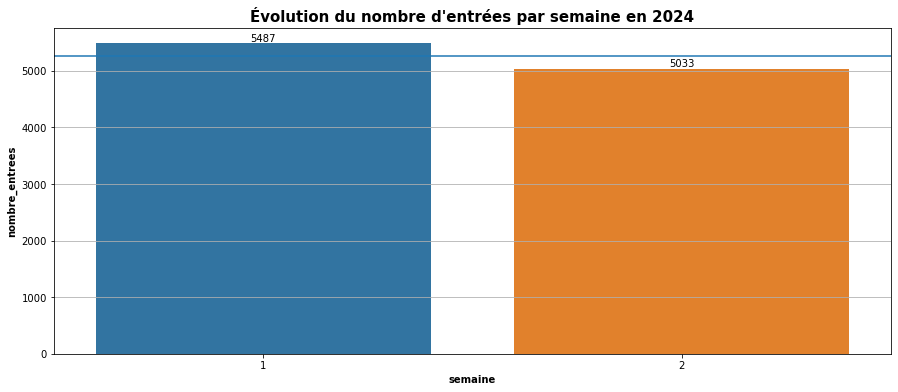

In [14]:
ax = sns.barplot(data=entrees_thisyear,x='semaine',y='nombre_entrees',estimator=sum,ci=None)
ax.set_title("Évolution du nombre d'entrées par semaine en 2024")
ax.axhline(y=entrees_thisyear.groupby('semaine')['nombre_entrees'].sum().mean())
for i in ax.containers:
    ax.bar_label(i,)

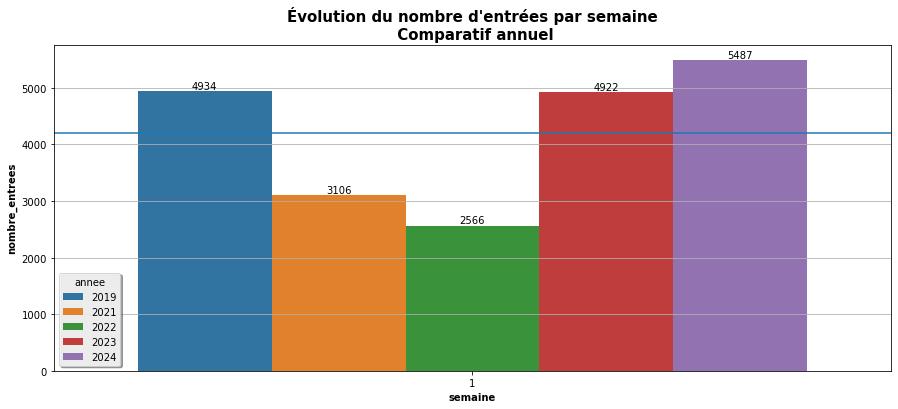

In [15]:
ax = sns.barplot(data=entrees_4lastweek_by_year,x='semaine',y='nombre_entrees',hue='annee')
ax.set_title("Évolution du nombre d'entrées par semaine\n Comparatif annuel")
ax.axhline(y=entrees_4lastweek_by_year['nombre_entrees'].mean())
for i in ax.containers:
    ax.bar_label(i,)

> **Attention** : pour les années 2019 et 2020, il manque des données sur certaines période. Cette absence de chiffre n'est pas signalée sur le graphique, ce dernier n'affiche que les années pour lesquelles des données sont présentes

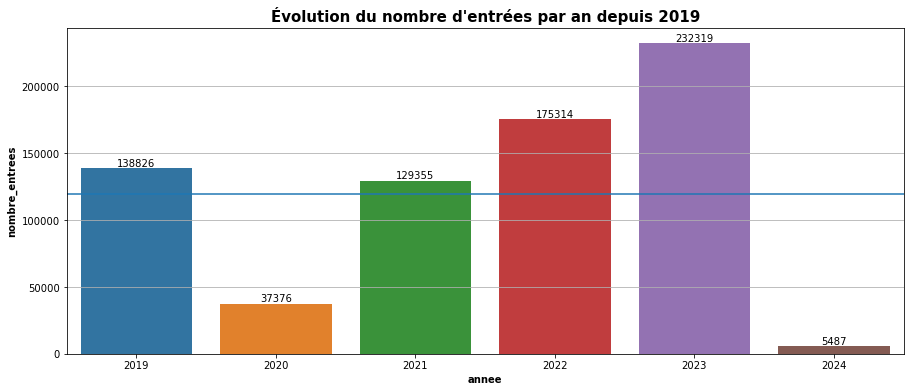

In [16]:
ax = sns.barplot(data=entrees,x='annee',y='nombre_entrees',estimator=sum,ci=None)
ax.set_title("Évolution du nombre d'entrées par an depuis 2019")
ax.axhline(y=entrees.groupby('annee')['nombre_entrees'].sum().mean())
for i in ax.containers:
    ax.bar_label(i,)